In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/logistic

/content/drive/MyDrive/logistic


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from scipy.stats import mode

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/logistic/emnist-letters-train.csv', header= None)
data = df.to_numpy()

In [ ]:
dataX = data[0:60000, 1:]
dataY = data[0:60000, 0]

In [ ]:
dataX.shape

(60000, 784)

In [ ]:
def distance(P, Q):
  return np.sqrt(((P-Q)**2).sum)

### To find the value of k

In [ ]:
# def mean_distance(P, Q):
#   return np.mean(np.sqrt(((P-Q)**2).sum(axis = 1)))

# def kmeans(dataX, dataY):
#   wcss_list = []
#   for k in range(1, 40):
#     print(k)
#     centers= dataX[np.random.choice((np.shape(dataX)[0]), k, replace = False),:]
#     distances = np.zeros([np.shape(dataX)[0], k], dtype = int)
#     closest_point = np.argmin(distances, axis=1)

#     while True:
#       old_closest = closest_point.copy()

#       for i in range(k):
#         distances[:, i] = (((dataX - centers[i])**2).sum(axis = 1))**0.5
      
#       closest_point = np.argmin(distances, axis=1)

#       for i in range(k):
#         centers[i,:] = (dataX[closest_point==i]).mean(axis = 0)
      
#       # wcss
#       dis = []
#       for i in range(k):
#         a = mean_distance(dataX[np.where(closest_point == i)], centers[i])
#         dis.append(a)
#       wcss = sum(dis)/len(dis)

#       if all(old_closest == closest_point):
#         break
#     wcss_list.append(wcss)


#   return closest_point, centers, wcss_list

In [ ]:
# closest_point, centers, wcss_list = kmeans(dataX, dataY)
# x =np.arange(1,40)
# mpl.plot(x , wcss_list)
# mpl.xticks(x)
# mpl.show

### This was the plot we got

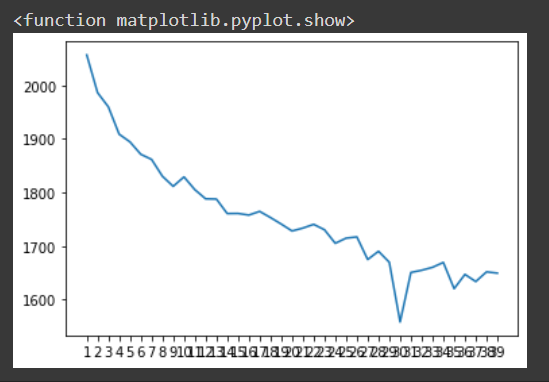

In [ ]:
def kmeans(dataX, dataY, k):

  #Taking Random Centers
  centers= dataX[np.random.choice((np.shape(dataX)[0]), k, replace = False),:]

  distances = np.zeros([np.shape(dataX)[0], k], dtype = int)  #examples,k

  closest_point = np.argmin(distances, axis=1)

  while True:
  # for iter in range(500):
  
    older = closest_point.copy()  #This is used to break the loop

  #Distance of each point with centers. 
    for i in range(k):
      distances[:, i] = (((dataX - centers[i])**2).sum(axis = 1))**0.5     #examples,k
      
    closest_point = np.argmin(distances, axis=1)   #Returns a matrix of examples,1

  #Now for new centers, I took the mean of the dataX points belonging to that cluster.

    for i in range(k):
      centers[i,:] = (dataX[np.where(closest_point==i)]).mean(axis = 0) 

  #Break the loop when no chenge in clusters
    if all(older == closest_point):
      break

  return closest_point, centers

In [ ]:
k=30
closest_point, centers = kmeans(dataX, dataY, k=k)

#### Assigning Label to my cluster

In [ ]:
#Took all the dataY labels of a particular cluster then took mode. The Y value with maximum count was assigned the label of that cluster.
claass =[]
for q in range(k):
  cluster = dataY[np.where(closest_point == q)].tolist()
  val = mode(cluster).mode[0]
  claass.append(val)
for i in range(np.size(claass)):
  print('cluster', i,'belogs to label', claass[i])

cluster 0 belogs to label 16.0
cluster 1 belogs to label 14.0
cluster 2 belogs to label 6.0
cluster 3 belogs to label 9.0
cluster 4 belogs to label 1.0
cluster 5 belogs to label 17.0
cluster 6 belogs to label 4.0
cluster 7 belogs to label 15.0
cluster 8 belogs to label 26.0
cluster 9 belogs to label 3.0
cluster 10 belogs to label 23.0
cluster 11 belogs to label 24.0
cluster 12 belogs to label 19.0
cluster 13 belogs to label 21.0
cluster 14 belogs to label 3.0
cluster 15 belogs to label 9.0
cluster 16 belogs to label 3.0
cluster 17 belogs to label 25.0
cluster 18 belogs to label 16.0
cluster 19 belogs to label 18.0
cluster 20 belogs to label 1.0
cluster 21 belogs to label 14.0
cluster 22 belogs to label 13.0
cluster 23 belogs to label 22.0
cluster 24 belogs to label 5.0
cluster 25 belogs to label 8.0
cluster 26 belogs to label 10.0
cluster 27 belogs to label 2.0
cluster 28 belogs to label 11.0
cluster 29 belogs to label 15.0


In [ ]:
#This is written just to check if my code is working properly. 
# I just reassigned the dataX to clusters and compared it with given Y values to get accuracy

distances = np.zeros([np.shape(dataX)[0], k], dtype = int)
for i in range(k):
  distances[:, i] = (((dataX - centers[i])**2).sum(axis = 1))**0.5
closest = np.argmin(distances, axis=1)

preds = []
for d in closest:
  pred = claass[d]
  preds.append(pred)

truths = (preds == dataY).tolist()
trues = truths.count(True)
accuracy = trues*100/(np.shape(dataX)[0])
accuracy

42.445